In [61]:
import pandas as pd; import numpy as np

In [140]:
np.random.seed(1)
df=pd.DataFrame(
    {"key1":list("aabbab"),
     "key2":["one","two","three"]*2,
     "data1":np.random.randn(6),
     "data2":np.random.randn(6)})
df

,key1,key2,data1,data2
0,a,one,1.624345,1.744812
1,a,two,-0.611756,-0.761207
2,b,three,-0.528172,0.319039
3,b,one,-1.072969,-0.249370
4,a,two,0.865408,1.462108
5,b,three,-2.301539,-2.060141


In [141]:
group = df['data1'].groupby(df['key1'])
group

In [142]:
group.mean()

key1
a    0.625999
b   -1.300893
Name: data1, dtype: float64

In [143]:
group = df[['data1']].groupby(df['key1'])
group.mean()

,data1
key1,
a,0.625999
b,-1.300893


In [144]:
df[['key1', 'data1', 'data2']].groupby('key1').mean()

,data1,data2
key1,,
a,0.625999,0.815238
b,-1.300893,-0.663491


In [145]:
df[['data1', 'data2']].groupby(df['key1']).mean()

,data1,data2
key1,,
a,0.625999,0.815238
b,-1.300893,-0.663491


In [146]:
df

,key1,key2,data1,data2
0,a,one,1.624345,1.744812
1,a,two,-0.611756,-0.761207
2,b,three,-0.528172,0.319039
3,b,one,-1.072969,-0.249370
4,a,two,0.865408,1.462108
5,b,three,-2.301539,-2.060141


In [177]:
av = df[['data1']].groupby(by=[df['key1'], df['key2']]).mean()
av

data1
key1 key2           
a    one    1.624345
     two    0.126826
b    one   -1.072969
     three -1.414855

In [178]:
av.unstack(level=-1)

data1                    
key2       one     three       two
key1                              
a     1.624345       NaN  0.126826
b    -1.072969 -1.414855       NaN

In [179]:
df.pivot_table(index='key1', columns='key2', values='data1', aggfunc='mean')

key2,one,three,two
key1,,,
a,1.624345,NaN,0.126826
b,-1.072969,-1.414855,NaN


In [180]:
df.pivot_table(index='key1', columns='key2', values=['data1', 'data2'], aggfunc='sum')

data1                        data2                    
key2       one    three       two       one     three       two
key1                                                           
a     1.624345      NaN  0.253651  1.744812       NaN  0.700901
b    -1.072969 -2.82971       NaN -0.249370 -1.741102       NaN

In [181]:
df

,key1,key2,data1,data2
0,a,one,1.624345,1.744812
1,a,two,-0.611756,-0.761207
2,b,three,-0.528172,0.319039
3,b,one,-1.072969,-0.249370
4,a,two,0.865408,1.462108
5,b,three,-2.301539,-2.060141


In [182]:
df.groupby("key1")[['data1', 'data2']].mean()

,data1,data2
key1,,
a,0.625999,0.815238
b,-1.300893,-0.663491


In [183]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                     
a    one    1.624345  1.744812
     two    0.126826  0.350451
b    one   -1.072969 -0.249370
     three -1.414855 -0.870551

In [184]:
df[['data1', 'data2']].groupby([df.key1, df.key2]).mean()

data1     data2
key1 key2                     
a    one    1.624345  1.744812
     two    0.126826  0.350451
b    one   -1.072969 -0.249370
     three -1.414855 -0.870551

In [192]:
df.groupby(['key1', 'key2'])[['data1']].mean()

data1
key1 key2           
a    one    1.624345
     two    0.126826
b    one   -1.072969
     three -1.414855

In [205]:
df[['key1', 'key2', 'data1']].groupby(['key1', 'key2']).mean()

data1
key1 key2           
a    one    1.624345
     two    0.126826
b    one   -1.072969
     three -1.414855

In [211]:
df

,key1,key2,data1,data2
0,a,one,1.624345,1.744812
1,a,two,-0.611756,-0.761207
2,b,three,-0.528172,0.319039
3,b,one,-1.072969,-0.249370
4,a,two,0.865408,1.462108
5,b,three,-2.301539,-2.060141


In [215]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  1.624345  1.744812
1    a  two -0.611756 -0.761207
4    a  two  0.865408  1.462108
b
  key1   key2     data1     data2
2    b  three -0.528172  0.319039
3    b    one -1.072969 -0.249370
5    b  three -2.301539 -2.060141


In [219]:
df

,key1,key2,data1,data2
0,a,one,1.624345,1.744812
1,a,two,-0.611756,-0.761207
2,b,three,-0.528172,0.319039
3,b,one,-1.072969,-0.249370
4,a,two,0.865408,1.462108
5,b,three,-2.301539,-2.060141


In [272]:
for (x1, x2), group in df.groupby(['key1', 'key2']):
    print(x1, x2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one  1.624345  1.744812
a two
  key1 key2     data1     data2
1    a  two -0.611756 -0.761207
4    a  two  0.865408  1.462108
b one
  key1 key2     data1    data2
3    b  one -1.072969 -0.24937
b three
  key1   key2     data1     data2
2    b  three -0.528172  0.319039
5    b  three -2.301539 -2.060141


In [274]:
piece = dict(list(df.groupby('key1')))
piece

{'a':   key1 key2     data1     data2
 0    a  one  1.624345  1.744812
 1    a  two -0.611756 -0.761207
 4    a  two  0.865408  1.462108,
 'b':   key1   key2     data1     data2
 2    b  three -0.528172  0.319039
 3    b    one -1.072969 -0.249370
 5    b  three -2.301539 -2.060141}

In [276]:
piece['a']

,key1,key2,data1,data2
0,a,one,1.624345,1.744812
1,a,two,-0.611756,-0.761207
4,a,two,0.865408,1.462108


In [277]:
df

,key1,key2,data1,data2
0,a,one,1.624345,1.744812
1,a,two,-0.611756,-0.761207
2,b,three,-0.528172,0.319039
3,b,one,-1.072969,-0.249370
4,a,two,0.865408,1.462108
5,b,three,-2.301539,-2.060141


In [332]:
df[df.key1=='a']

,key1,key2,data1,data2
0,a,one,1.624345,1.744812
1,a,two,-0.611756,-0.761207
4,a,two,0.865408,1.462108


In [335]:
games = pd.read_csv(r'C:\Users\dell\Desktop\img\vgsalesGlobale.csv')
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Syrup - Monin - Passion Fruit,Nintendo Switch,2008,Action,Devshare,82.51,20.44,8.39,10.16,7.01
1,2,Yams,Nintendo Switch,2010,Sports,Muxo,7.43,8.40,9.66,3.07,6.33
2,3,"Pepsi, 355 Ml",PS4,1985,Sports,Eidel,17.50,17.96,7.15,4.74,5.63
3,4,Gherkin,Xbox One,2016,Action,Mynte,13.05,5.60,5.64,6.97,1.23
4,5,Pastry - French Mini Assorted,Nintendo Switch,2020,Shooter,Quinu,16.92,24.00,5.59,5.16,3.66
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Shrimp - Black Tiger 16/20,Xbox One,1985,Sports,Edgewire,77.09,3.36,0.69,10.33,0.34
996,997,Muffin Mix - Morning Glory,Xbox One,2011,Shooter,Skyba,5.14,8.72,4.02,7.42,8.20
997,998,Muffin Orange Individual,PS4,1996,Action,Topicstorm,19.89,27.42,4.02,4.12,0.65
998,999,Sage - Ground,PS4,1997,Sports,Jabbertype,38.59,7.22,6.20,3.71,0.09


In [336]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Syrup - Monin - Passion Fruit,Nintendo Switch,2008,Action,Devshare,82.51,20.44,8.39,10.16,7.01
1,2,Yams,Nintendo Switch,2010,Sports,Muxo,7.43,8.40,9.66,3.07,6.33
2,3,"Pepsi, 355 Ml",PS4,1985,Sports,Eidel,17.50,17.96,7.15,4.74,5.63
3,4,Gherkin,Xbox One,2016,Action,Mynte,13.05,5.60,5.64,6.97,1.23
4,5,Pastry - French Mini Assorted,Nintendo Switch,2020,Shooter,Quinu,16.92,24.00,5.59,5.16,3.66


In [340]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [341]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2001.02100,41.325110,14.142520,5.074350,5.360470,5.348440
std,288.819436,12.28664,24.012333,8.231226,2.986946,3.025754,3.069422
min,1.000000,1980.00000,0.140000,0.090000,0.030000,0.020000,0.000000
25%,250.750000,1990.00000,20.127500,7.037500,2.447500,2.722500,2.727500
50%,500.500000,2001.00000,40.960000,14.125000,5.095000,5.515000,5.430000
75%,750.250000,2011.00000,61.792500,21.375000,7.695000,7.960000,8.072500
max,1000.000000,2022.00000,82.730000,29.000000,10.220000,10.550000,10.560000


In [343]:
games.dropna().describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2001.02100,41.325110,14.142520,5.074350,5.360470,5.348440
std,288.819436,12.28664,24.012333,8.231226,2.986946,3.025754,3.069422
min,1.000000,1980.00000,0.140000,0.090000,0.030000,0.020000,0.000000
25%,250.750000,1990.00000,20.127500,7.037500,2.447500,2.722500,2.727500
50%,500.500000,2001.00000,40.960000,14.125000,5.095000,5.515000,5.430000
75%,750.250000,2011.00000,61.792500,21.375000,7.695000,7.960000,8.072500
max,1000.000000,2022.00000,82.730000,29.000000,10.220000,10.550000,10.560000


In [344]:
games.Global_Sales.mean()

5.34844

In [345]:
games[['Global_Sales']].mean()

Global_Sales    5.34844
dtype: float64

In [350]:
games[['Global_Sales']].agg(np.mean)

Global_Sales    5.34844
dtype: float64

In [351]:
games[['Global_Sales']].agg('mean')

Global_Sales    5.34844
dtype: float64

In [352]:
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Syrup - Monin - Passion Fruit,Nintendo Switch,2008,Action,Devshare,82.51,20.44,8.39,10.16,7.01
1,2,Yams,Nintendo Switch,2010,Sports,Muxo,7.43,8.40,9.66,3.07,6.33
2,3,"Pepsi, 355 Ml",PS4,1985,Sports,Eidel,17.50,17.96,7.15,4.74,5.63
3,4,Gherkin,Xbox One,2016,Action,Mynte,13.05,5.60,5.64,6.97,1.23
4,5,Pastry - French Mini Assorted,Nintendo Switch,2020,Shooter,Quinu,16.92,24.00,5.59,5.16,3.66
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Shrimp - Black Tiger 16/20,Xbox One,1985,Sports,Edgewire,77.09,3.36,0.69,10.33,0.34
996,997,Muffin Mix - Morning Glory,Xbox One,2011,Shooter,Skyba,5.14,8.72,4.02,7.42,8.20
997,998,Muffin Orange Individual,PS4,1996,Action,Topicstorm,19.89,27.42,4.02,4.12,0.65
998,999,Sage - Ground,PS4,1997,Sports,Jabbertype,38.59,7.22,6.20,3.71,0.09


In [365]:
games.Genre.value_counts()

Genre
Shooter    343
Sports     336
Action     321
Name: count, dtype: int64

In [366]:
group_genre = games.groupby('Genre')
group_genre[['Global_Sales']].count()

,Global_Sales
Genre,
Action,321
Shooter,343
Sports,336


In [367]:
group_genre[['Global_Sales']].describe()

Global_Sales                                                     
               count      mean       std   min    25%    50%   75%    max
Genre                                                                    
Action         321.0  5.540249  3.053036  0.03  3.020  5.860  8.19  10.53
Shooter        343.0  5.359038  3.054940  0.05  2.620  5.330  8.02  10.56
Sports         336.0  5.154375  3.096908  0.00  2.715  4.945  8.00  10.55

In [406]:
group_genre = games.iloc[:, [0, 3, 6, 7, 8, 9, 10]].groupby(games.Genre)
group_genre[['Global_Sales']].count()

,Global_Sales
Genre,
Action,321
Shooter,343
Sports,336


In [407]:
group_genre.mean()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,502.003115,2000.853583,40.200748,14.229315,4.962025,5.075919,5.540249
Shooter,503.104956,2001.422741,41.732507,14.227638,5.111545,5.583848,5.359038
Sports,496.404762,2000.770833,41.983393,13.972708,5.143690,5.404286,5.154375


In [412]:
%matplotlib inline

In [416]:
group_genre[["Global_Sales"]].mean()

,Global_Sales
Genre,
Action,5.540249
Shooter,5.359038
Sports,5.154375


<Axes: xlabel='Genre'>

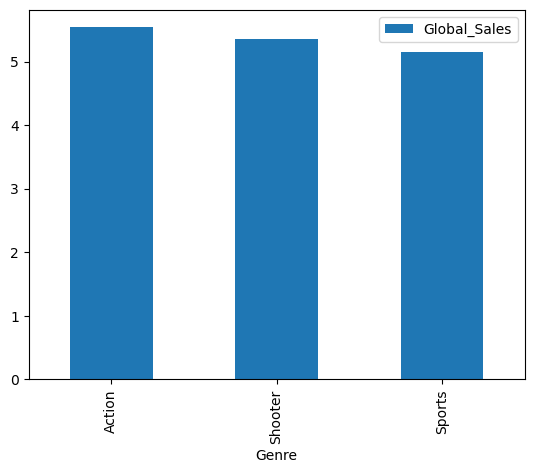

In [421]:
group_genre[["Global_Sales"]].mean().plot(kind = 'bar')

In [422]:
group_genre[["Global_Sales"]].count()

,Global_Sales
Genre,
Action,321
Shooter,343
Sports,336


<Axes: xlabel='Genre'>

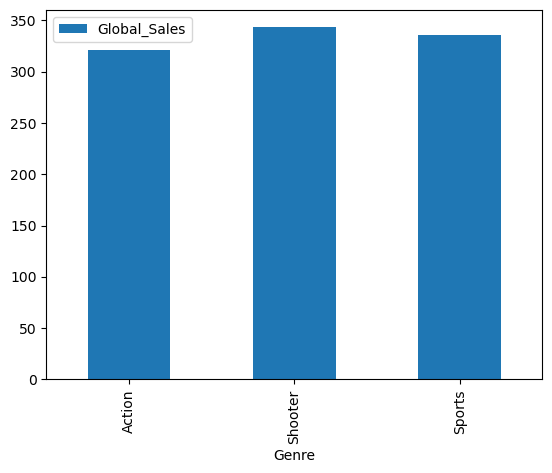

In [423]:
group_genre[["Global_Sales"]].count().plot(kind='bar')